# 1 Project 0 Introduction
This project provides a test bed for basic data maniputation and exploratory analysis. The data
was collected from a shopping App, where people can sell and buy new or used products. Columns
of the data are organized in the following ways

1. train id: the id of the product
2. name: the title of the product
3. item condition id: the condition of the product provided by the sellers
4. category name: category of the product
5. brand name: the product's brand name
6. shipping: 1 if shipping fee is paid by seller and 0 if shipping fee is paid by buyer
7. item description: the full description of the product
8. price: the price that the product was sold for

The dataset is provided in "P0 price.tsv" (https://nusu.sharepoint.com/sites/Section_2010_4539/Class%20Materials/P0_price.tsv), which is a tab separated file with the header.</br>
Please read the data into your project (Jupyter Notebook), and perform the following analysis or exploration. Please take note of following points in your submission.</br>
 - Please using one block of codes to address each one of the questions below.
 - Organize the questions and outputs in the same sequence as shown below.
 - Attempt to use the simplist way/function to answer the questions.


# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


fhand = pd.read_csv('P0_price.tsv', sep='\t') #seperate by tab

# 2 Exploratory Analysis

## 1. How many number of samples are included in the dataset?

In [2]:
print(fhand.shape[0], 'samples')        #find sum of registered item

1482535 samples


## 2. List the number of missing values in each of the 8 columns.


In [3]:
fhand.isnull().sum()                    #find sum of NaN in each columns

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

## 3. Split the data in the column "categories" into 3 columns: "main category",  "first subcategory",and "second subcategory"

In [5]:
fhand[['main_category','subcategory', 'second_subcategory']] = fhand.category_name.str.split("/",2 ,expand=True)

## 4. List the unique "categories" in the data. (refer to main category)


In [13]:
fhand['main_category'].unique()

array(['Men', 'Electronics', 'Women', 'Home', 'Sports & Outdoors',
       'Vintage & Collectibles', 'Beauty', 'Other', 'Kids', nan,
       'Handmade'], dtype=object)

## 5. List the number of products each category have, ranked in descending order.

In [70]:
fhand['main_category'].value_counts()

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Name: main_category, dtype: int64

## 6. Plot the sorted frequency of categories.

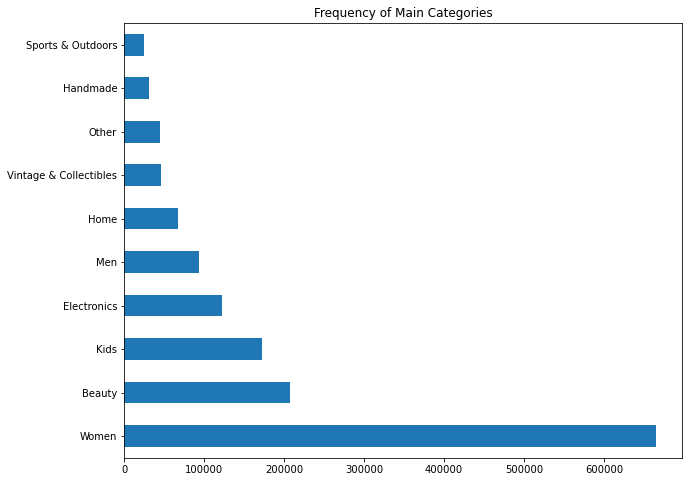

In [6]:
fhand['main_category'].value_counts().plot(kind='barh',figsize=(10,8), title='Frequency of Main Categories')

## 7. List the top 10 first subcategories by product count.

In [8]:
fhand.groupby(['main_category','subcategory']).size().sort_values(ascending=False).head(10)

main_category  subcategory              
Beauty         Makeup                       124624
Women          Athletic Apparel             123457
               Tops & Blouses               106960
               Shoes                         77654
Kids           Toys                          57709
Women          Jewelry                       56837
Electronics    Cell Phones & Accessories     53290
Women          Women's Handbags              45862
               Dresses                       45758
               Women's Accessories           42350
dtype: int64

## 8. List the top 10 first subcatgories by product average price.

In [17]:
fhand.groupby(['main_category','subcategory']).price.mean().sort_values(ascending=False).head(10)

main_category           subcategory             
Electronics             Computers & Tablets         87.887754
Vintage & Collectibles  Bags and Purses             87.515966
Electronics             Cameras & Photography       71.343813
Kids                    Strollers                   67.280922
Men                     Shoes                       61.688350
Women                   Women's Handbags            58.201648
Other                   Musical instruments         46.684109
Electronics             TV, Audio & Surveillance    44.159542
Sports & Outdoors       Footwear                    42.998148
                        Golf                        41.606742
Name: price, dtype: float64

## 9. List the top 10 popular brands by item counts.

In [29]:
fhand['brand_name'].value_counts().head(10)

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
FOREVER 21           15186
Nintendo             15007
Lululemon            14558
Michael Kors         13928
American Eagle       13254
Name: brand_name, dtype: int64

## 10. Historgram of the product counts by item conditions.

Text(0, 0.5, 'Product count')

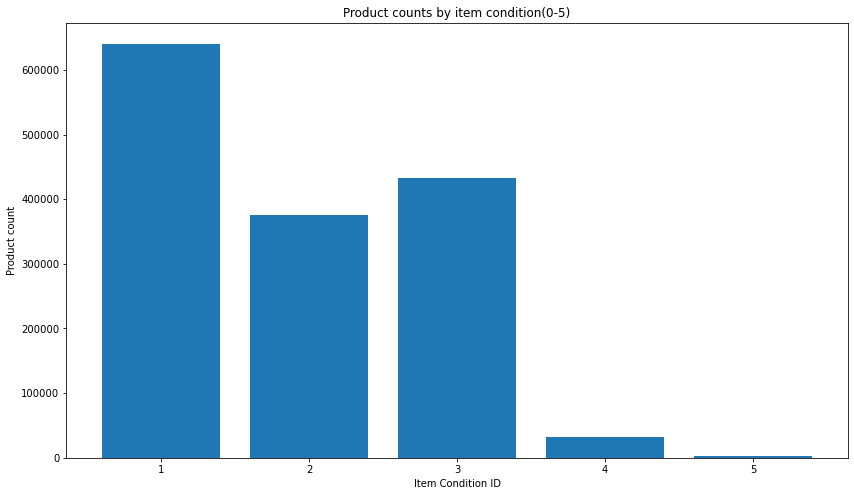

In [12]:
itemcon_count=pd.DataFrame(fhand['item_condition_id'].value_counts()).reset_index().sort_values('index',ascending=True)

#plotgraph, bar chart is better since it is discrete items.
plt.figure(figsize=(14,8))
plt.bar(itemcon_count['index'], itemcon_count['item_condition_id'])
plt.title('Product counts by item condition(0-5)')
plt.xlabel('Item Condition ID')
plt.ylabel('Product count')


## 11. Plot and compare the price distribution for products with shipping paid by sellers and buyers respectively.

<function matplotlib.pyplot.show(*args, **kw)>

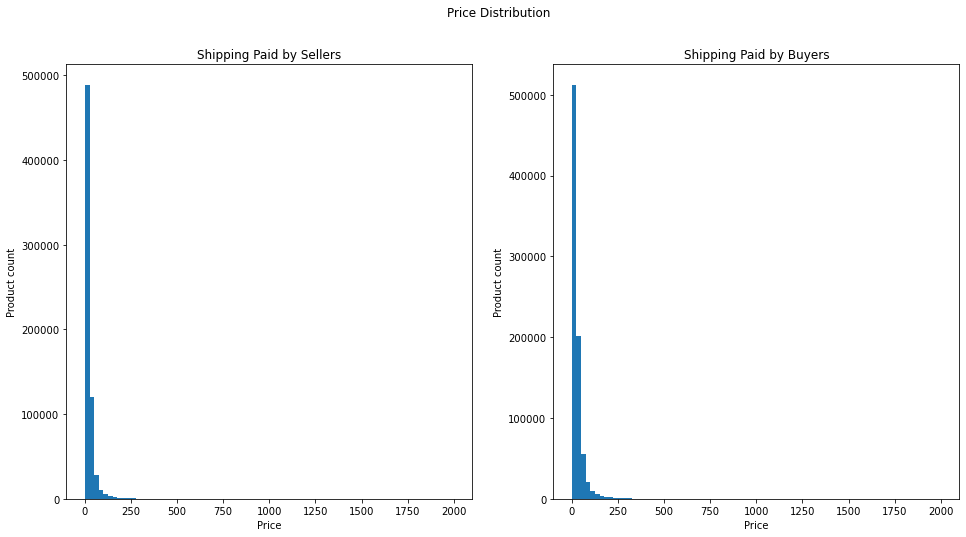

In [79]:
#shipping=1,paidbyseller
byseller=fhand[fhand["shipping"] == 1 ]
bybuyer=fhand[fhand["shipping"] == 0 ]

#categorise price by bin of 25
binlist=[x for x in range(0,2001,25)]

#plotgraph
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.hist(byseller['price'], bins=binlist)
plt.title('Shipping Paid by Sellers')
plt.xlabel('Price')
plt.ylabel('Product count')

plt.subplot(1,2,2)
plt.hist(bybuyer['price'], bins=binlist)
plt.title('Shipping Paid by Buyers')
plt.xlabel('Price')
plt.ylabel('Product count')

plt.suptitle("Price Distribution")
plt.show

## 12. Replace the numbers in "item condition id" by letters, i.e.,"1=>A, 2=>B,...". List the first 5 samples after replacement.

In [2]:
mapping={1:'A',
         2:'B',
         3:'C',
         4:'D',
         5:'E'}

fhand.replace({'item_condition_id': mapping}, inplace=True)
print(fhand.head(5))

   train_id                                 name item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                 C   
1         1     Razer BlackWidow Chroma Keyboard                 C   
2         2                       AVA-VIV Blouse                 A   
3         3                Leather Horse Statues                 A   
4         4                 24K GOLD plated rose                 A   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                                 No description yet  
1   

## 13. Find out the "category" and "condition" combination such that it has highest percentage of shippings paid by sellers.

In [33]:
#Filter products with shipping paid by seller
grpbyseller=fhand[fhand["shipping"] == 1 ]

#Group products with 'seller paid shipping'  by "category" and "condition" combination
datas=pd.DataFrame(grpbyseller.groupby(['main_category','item_condition_id']).size()).reset_index()

#Shipping has no null value, so product count grouped by 'cat' and 'con' is the total shippings per the group.
#Group all products by "category" and "condition" combination
data_original=pd.DataFrame(fhand.groupby(['main_category','item_condition_id']).size()).reset_index()

#Find the percentage of seller paid shipping within product group
newdata=datas.assign(Percentage= round((datas[0]/data_original[0]*100),2))

#Output highest% shippings paid by seller
newdata.sort_values(by = "Percentage", ascending = False).drop([0],axis=1).head(1)


,main_category,item_condition_id,Percentage
5,Electronics,1,75.23


## 14. Find out the "brand" and "condition" combination such that it has highest percentage of shippings paid by buyers.

In [95]:
#Group all products by "brand_name" and "condition" combination
data=pd.DataFrame(fhand.groupby(['brand_name','item_condition_id','shipping']).size()).reset_index()
#17451
newlist=[]

for n in range(1,50):
    a=0
    if data['brand_name'][n]==data['brand_name'][n-1] and data['item_condition_id'][n]==data['item_condition_id'][n-1]:
        a=round(int(data[0][n])/int((data[0][n])+(data[0][n-1]))*100,2)      
        newlist.append(a)
    else:
        newlist.append(0)
    
data['Percentage']=pd.DataFrame(newlist)

#Output highest% shippings paid by seller
data.sort_values(by = "Percentage", ascending = False).drop([0],axis=1).head(1)


,brand_name,item_condition_id,shipping,Percentage
23,3.1 Phillip Lim,3,0,88.89


## 15. Generate the word cloud based on the "descriptions" of all items.

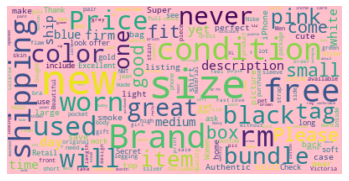

In [85]:
# Import package
from wordcloud import WordCloud, STOPWORDS

l=int(fhand.shape[0])
#1482535 input data
text = ' '.join(fhand.item_description[n] for n in range(1482535) if type((fhand.item_description[n])) == str )

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='black',
                      max_font_size = 50,
                      collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 16. Generate the word cloud based on the "descriptions" of the top 10% most expenstive items.

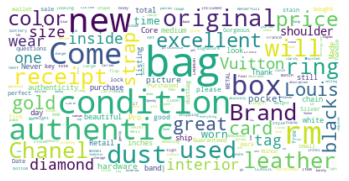

In [125]:
data_price=(pd.DataFrame(fhand.groupby(['price']).size())).sort_values(by=['price']).reset_index()
benchmark=int(np.percentile(data_price['price'], 90))

# Import package
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(fhand.item_description[n] for n in range(1482535) if fhand.price[n]>benchmark and type((fhand.item_description[n])) == str )

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white',
                      max_font_size = 50,
                      collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## 17. For all items in the first subcategory "athletic apparel", plot and compare the price distributions, for different conditions.

855.0


Text(0.5, 0.98, 'Price Distribution of Products under Athletic Apparel Subcategory')

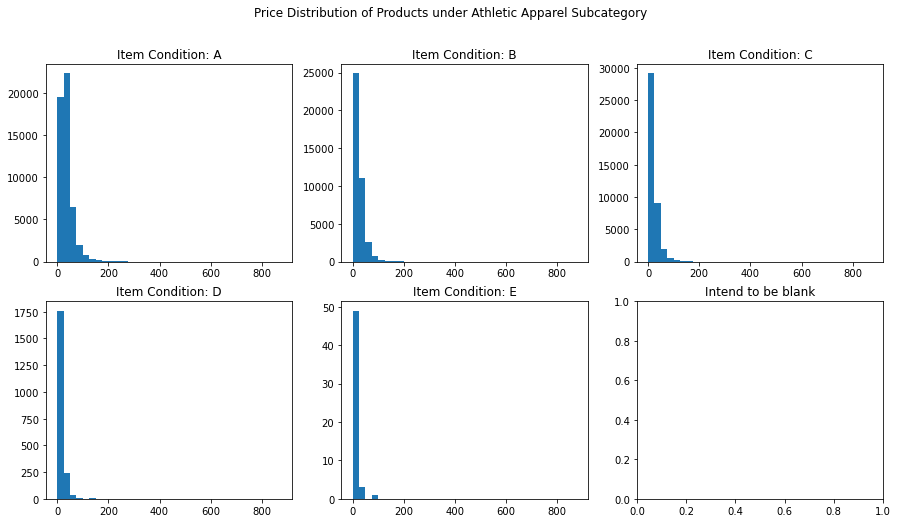

In [123]:
A_A=fhand[fhand["subcategory"] == 'Athletic Apparel' ]
max_price=max(A_A['price'])
ConA=A_A[A_A["item_condition_id"] == 'A' ]
ConB=A_A[A_A["item_condition_id"] == 'B' ]
ConC=A_A[A_A["item_condition_id"] == 'C' ]
ConD=A_A[A_A["item_condition_id"] == 'D' ]
ConE=A_A[A_A["item_condition_id"] == 'E' ]

#categorise price by bin of 25
print(max_price)
binlist=[x for x in range(0,int(max_price+25),25)]

#plotgraph
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(15,8))

ax[0,0].hist(ConA['price'],bins=binlist )
ax[0,0].set_title("Item Condition: A")

ax[0,1].hist(ConB['price'],bins=binlist )
ax[0,1].set_title("Item Condition: B")

ax[0,2].hist(ConC['price'],bins=binlist )
ax[0,2].set_title("Item Condition: C")

ax[1,0].hist(ConD['price'],bins=binlist )
ax[1,0].set_title("Item Condition: D")

ax[1,1].hist(ConE['price'],bins=binlist )
ax[1,1].set_title("Item Condition: E")

ax[1,2].set_title("Intend to be blank")

plt.suptitle('Price Distribution of Products under Athletic Apparel Subcategory')

## 18. Create a pie chart of main categories, proportional to sales revenue.

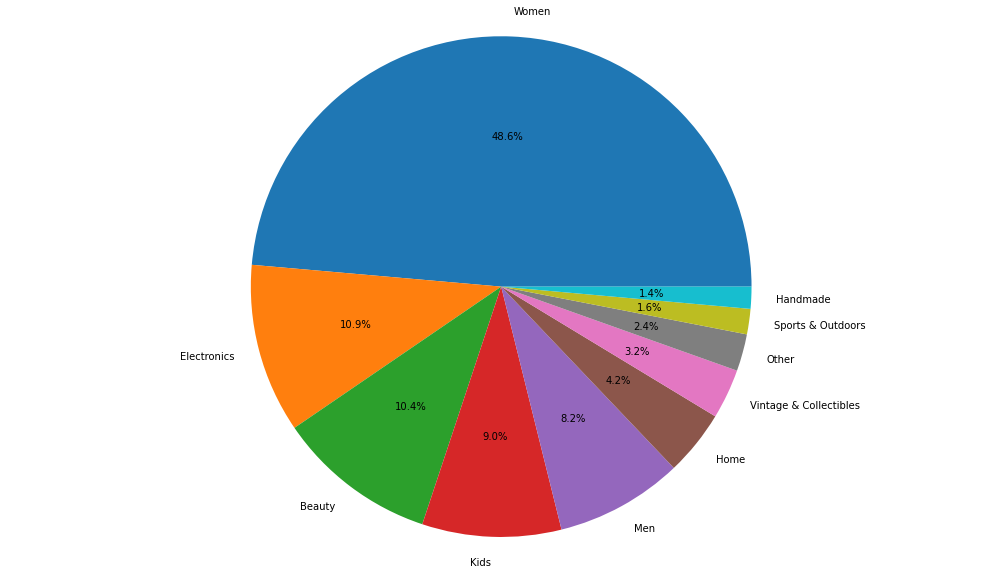

In [68]:
# Data to plot
newdict=dict(fhand.groupby(['main_category']).price.sum().sort_values(ascending=False))

# Plot
plt.figure(figsize=(14,8))
labels=list(newdict.keys())
sizes=list(newdict.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.tight_layout()
plt.axis('equal') # make the pie chart circular
plt.show()

## 19. (Optional) Other exploratory analysis you feel relevant and informative.